# Interview Questions - 1 : Three in One

**Describe how you could use a single Python list to implement three stacks.**

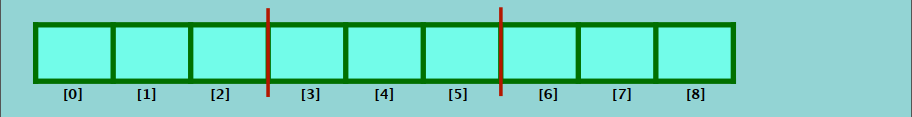

**Stack Creation Logic**:

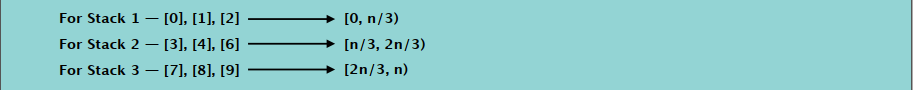

**Note**:
* `[` - element is included.
* `)` - element not included.



In [2]:
# Use a single list to implement three stacks.

class MultiStack:
    def __init__(self, stacksize):
        self.numberstacks = 3
        self.custList = [0] * (stacksize * self.numberstacks)
        self.sizes = [0] * self.numberstacks
        self.stacksize = stacksize
    
    def isFull(self, stacknum):
        if self.sizes[stacknum] == self.stacksize:
            return True
        else:
            return False
    
    def isEmpty(self, stacknum):
        if self.sizes[stacknum] == 0:
            return True
        else:
            return False
    
    def indexOfTop(self, stacknum):
        offset = stacknum * self.stacksize
        return offset + self.sizes[stacknum]- 1
    
    def push(self, item, stacknum):
        if self.isFull(stacknum):
            return "[]"
        else:
            self.sizes[stacknum] += 1
            self.custList[self.indexOfTop(stacknum)] = item
    
    def pop(self, stacknum):
        if self.isEmpty(stacknum):
            return "[]"
        else:
            value = self.custList[self.indexOfTop(stacknum)]
            self.custList[self.indexOfTop(stacknum)] = 0
            self.sizes[stacknum] -= 1
            return value
    
    def peek(self, stacknum):
        if self.isEmpty(stacknum):
            return "[]"
        else:
            value = self.custList[self.indexOfTop(stacknum)]
            return value


customStack = MultiStack(6)
print(customStack.isFull(0))
print(customStack.isEmpty(1))
customStack.push(1, 0)
customStack.push(2, 0)
customStack.push(3, 2)
print(customStack.pop(0))

False
True
2


# Interview Questions - 2 : Stack Min

**How would you design a stack which, in addition to push and pop, has a function min which returns the minimum element?**

Push, pop and min should all operate in `O(1)`.

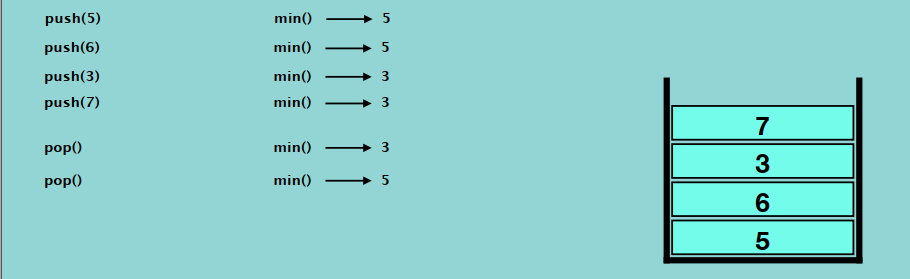

In [3]:
#   Create Stack with min method

class Node():
    def __init__(self, value=None, next = None):
        self.value = value
        self.next = next
    
    def __str__(self):
        string = str(self.value)
        if self.next:
            string += ',' + str(self.next)
        return string

class Stack():
    def __init__(self):
        self.top = None
        self.minNode = None
    
    def min(self):
        if not self.minNode:
            return None
        return self.minNode.value
    
    def push(self, item):
        if self.minNode and (self.minNode.value < item):
            self.minNode = Node(value = self.minNode.value, next=self.minNode)
        else:
            self.minNode = Node(value = item, next=self.minNode)
        self.top = Node(value=item, next=self.top)
    
    def pop(self):
        if not self.top:
            return None
        self.minNode = self.minNode.next
        item = self.top.value
        self.top = self.top.next
        return item

customStack = Stack()
customStack.push(5)
print(customStack.min())
customStack.push(6)
print(customStack.min())
customStack.push(3)
print(customStack.min())
customStack.pop()
print(customStack.min())


5
5
3
5


# Interview Questions - 3 : Stack of Plates

Imagine a (literal) stack of plates. 
* If the stack gets too high, it might topple.
* Therefore, in real life, we would likely start a new stack when the previous stack exceeds some threshold.
* Implement a data structure **SetOfStacks** that mimics this.
* **SetOfStacks** should be composed of several stacks and should create a new stack once the previous one exceeds capacity.
* `SetOfStacks.push()` and `SetOfStacks.pop()` should behave identically to a single stack (that is, `pop( )` should return the same values as it would if there were just a single stack).

**Follow Up:**

Implement a function `popAt (int index)` which performs a pop operation on a specific sub - stack.

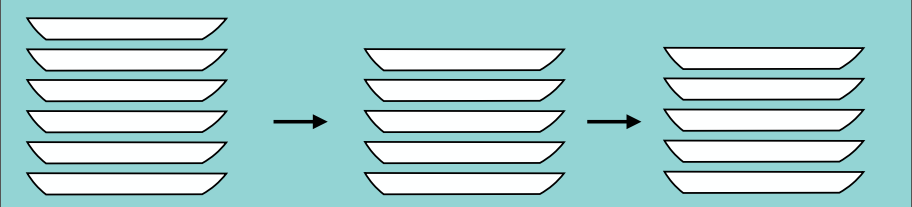

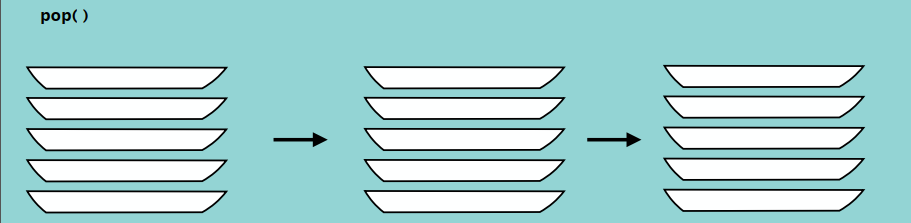


In [4]:
# Stack of Plates

class PlateStack():
    def __init__(self, capacity):
        self.capacity = capacity
        self.stacks = []
    
    def __str__(self):
        return self.stacks
    
    def push(self, item):
        if len(self.stacks) > 0 and (len(self.stacks[-1])) < self.capacity:
            self.stacks[-1].append(item)
        else:
            self.stacks.append([item])
    
    def pop(self):
        while len(self.stacks) and len(self.stacks[-1]) == 0:
            self.stacks.pop()
        if len(self.stacks) == 0:
            return None
        else:
            return self.stacks[-1].pop()
    
    def pop_at(self, stackNumber):
        if len(self.stacks[stackNumber]) > 0:
            return self.stacks[stackNumber].pop()
        else:
            return None


customStack= PlateStack(2)
customStack.push(1)
customStack.push(2)
customStack.push(3)
customStack.push(4)
print(customStack.pop_at(1))

4


# Interview Questions - 4 : Queue via Stacks

Implement Queue class which implements a queue using two stacks.

**Dequeue()**

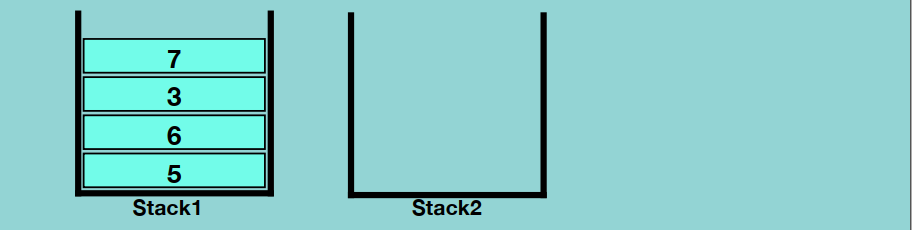

In [5]:
# Implement a queue using two stacks.

class Stack():
  def __init__(self):
    self.list = []
  
  def __len__(self):
    return len(self.list)
  
  def push(self, item):
    self.list.append(item)
  
  def pop(self):
    if len(self.list) == 0:
      return None
    return self.list.pop()

class QueueviaStack():
  def __init__(self):
    self.inStack = Stack()
    self.outStack = Stack()
  
  def enqueue(self, item):
    self.inStack.push(item)
  
  def dequeue(self):
    while len(self.inStack):
      self.outStack.push(self.inStack.pop())
    result = self.outStack.pop()
    while len(self.outStack):
      self.inStack.push(self.outStack.pop())
    return result
  

customQueue = QueueviaStack()
customQueue.enqueue(1)
customQueue.enqueue(2)
customQueue.enqueue(3)
print(customQueue.dequeue())
customQueue.enqueue(4)
print(customQueue.dequeue())

1
2


# Interview Questions - 5 : Animal Shelter

An animal shelter, which holds only dogs and cats, operates on a strictly **"first in, first out"** basis. 
* People must adopt either the "oldest" (based on arrival time) of all animals at the shelter, or they can select whether they would prefer a dog or a cat (and will receive the oldest animal of that type).
* They cannot select which specific animal they would like.

**Create the data structures to maintain this system and implement operations such as enqueue, dequeueAny, dequeueDog, and dequeueCat.**

**First In First Out**

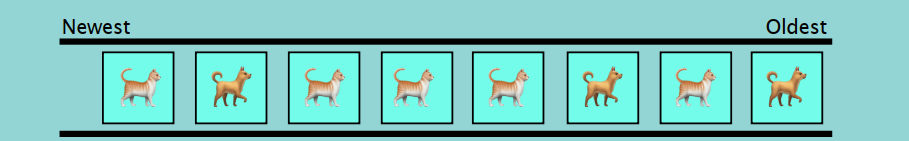

```
Enqueue(Dog)
Enqueue(Cat)
DequeueAny()
DequeueDog()
DequeueCat()
```

In [6]:
# Implement a cat and dog queue for an animal shelter.

class AnimalShelter():
  def __init__(self):
    self.cats = []
    self.dogs = []
  
  def enqueue(self, animal, type):
    if type == 'Cat':
      self.cats.append(animal)
    else:
      self.dogs.append(animal)
    
  def dequeueCat(self):
    if len(self.cats) == 0:
      return None
    else:
      cat = self.cats.pop(0)
      return cat
  
  def dequeueDog(self):
    if len(self.dogs) == 0:
      return None
    else:
      dog = self.dogs.pop(0)
      return dog
  
  def dequeueAny(self):
    if len(self.cats) == 0:
      result = self.dogs.pop(0)
    else:
      result = self.cats.pop(0)
    return result

customQueue = AnimalShelter()
customQueue.enqueue('Cat1', 'Cat')
customQueue.enqueue('Cat2', 'Cat')
customQueue.enqueue('Dog1', 'Dog')
customQueue.enqueue('Cat3', 'Cat')
customQueue.enqueue('Dog2', 'Dog')
print(customQueue.dequeueAny())


Cat1


# Interview Questions - 6 : Sorted Stack

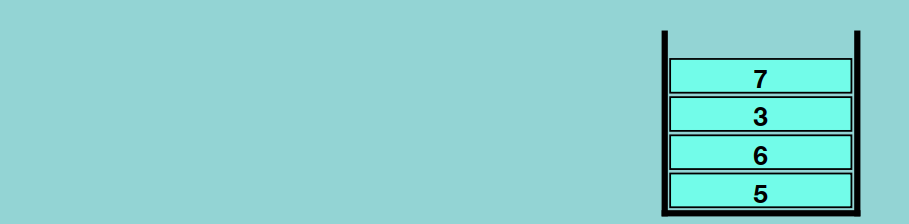

In [12]:
# Sort a stack with the smallest on top using only a single temporary stack.

def sort_stack(stack):
  previous = stack.pop()
  current = stack.pop()
  temp = Stack()
  while current:
    if previous < current:
      temp.push(previous)
      previous = current
      current = stack.pop()
    else: 
      temp.push(current)
      current = stack.pop()
    if current == None and previous: temp.push(previous)
       
  sorted = True
  previous = temp.pop()
  current = temp.pop()
  while current:
    if previous > current:
      stack.push(previous)
      previous = current
      current = temp.pop()
    else: 
      stack.push(current)
      current = temp.pop()
      sorted = False
    if current == None and previous: stack.push(previous)
  if sorted: return stack
  else: return sort_stack(stack)

class Stack():
  def __init__(self):
    self.top = None
  
  def __str__(self):
    return str(self.top)
  
  def push(self, item):
    self.top = current(item, self.top)
  
  def pop(self):
    if not self.top:
      return None
    item = self.top
    self.top = self.top.next
    return item.data

class current():
  def __init__(self, data=None, next=None):
    self.data, self.next = data, next
  
  def __str__(self):
    return str(self and self.data) + ',' + str(self and self.next)

import unittest

class Test(unittest.TestCase):
  def test_sort_stack(self):
    self.assertEqual(str(sort_stack(Stack())), "None")
    stack = Stack()
    stack.push(10)
    stack.push(30)
    stack.push(70)
    stack.push(40)
    stack.push(80)
    stack.push(20)
    stack.push(90)
    stack.push(50)
    stack.push(60)
    self.assertEqual(str(stack), "60,50,90,20,80,40,70,30,10,None")
    self.assertEqual(str(sort_stack(stack)), "10,20,30,40,50,60,70,80,90,None")

mytest = Test()
mytest.test_sort_stack()